In [ ]:
#I had to install because it wasn't avalaible in collab inbuilt

!pip install category_encoders

**1) First of all we will import all the necessary libraries to make this project .**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report

**2) Now we will import the dataset from our desktop and converting it into dataframes .**

In [ ]:
df=pd.read_csv(r"bank-full (1).csv", sep=";")
df.rename(columns={'y':'target'}, inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


**3) We get to know the rows and columns in the datasets .**

In [ ]:
df.shape

(45211, 17)

**4) All the columns name that are present in the dataset .**

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'target'],
      dtype='object')

**5) Now we are checking whether there is any null value in any of the data of the column .**

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

**6) Checking the data types of elements in each column .**

In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
target       object
dtype: object

**7) Creating a function that will shows the necessary information of our datasets .**

In [ ]:
def dataset_info(df):
    if isinstance(df, pd.DataFrame):
        is_na=df.isna().sum().sum()
        print("Datatype shape =", df.shape)
        print("any null values =", is_na,"\n")
        col=df.columns
        datatype=df.dtypes
        uniq=df.nunique()
        print("\033[1m", "S.NO "," column"," datatype", "uniquedata", "\n")
        for i in range(len(df.columns)):
            print("%d %10s %10s %10s" %(i+1,col[i],datatype[i],uniq[i]))

**8) Calling the function to print the info .**

In [ ]:
dataset_info(df)

Datatype shape = (45211, 17)
any null values = 0 

 S.NO   column  datatype uniquedata 

1        age      int64         77
2        job     object         12
3    marital     object          3
4  education     object          4
5    default     object          2
6    balance      int64       7168
7    housing     object          2
8       loan     object          2
9    contact     object          3
10        day      int64         31
11      month     object         12
12   duration      int64       1573
13   campaign      int64         48
14      pdays      int64        559
15   previous      int64         41
16   poutcome     object          4
17     target     object          2


**9) Checking the attributes of dataset whether they are categorial or numerical .**

In [ ]:
catagorical_data=[j for j in df.columns if df[j].dtype=="0"]
print("keys with catagorical dataset are: ","\033[1m", catagorical_data)
num=[k for k in df.columns if df[k].dtype!="0"]
print("\033[0m", "keys with numerical dataset are: ""\033[1m", num)

keys with catagorical dataset are:   []
 keys with numerical dataset are:  ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'target']


**10) EDA of attributes**



1. Age



<ipython-input-46-de4c017fa1be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age', data=df,palette="Set1")


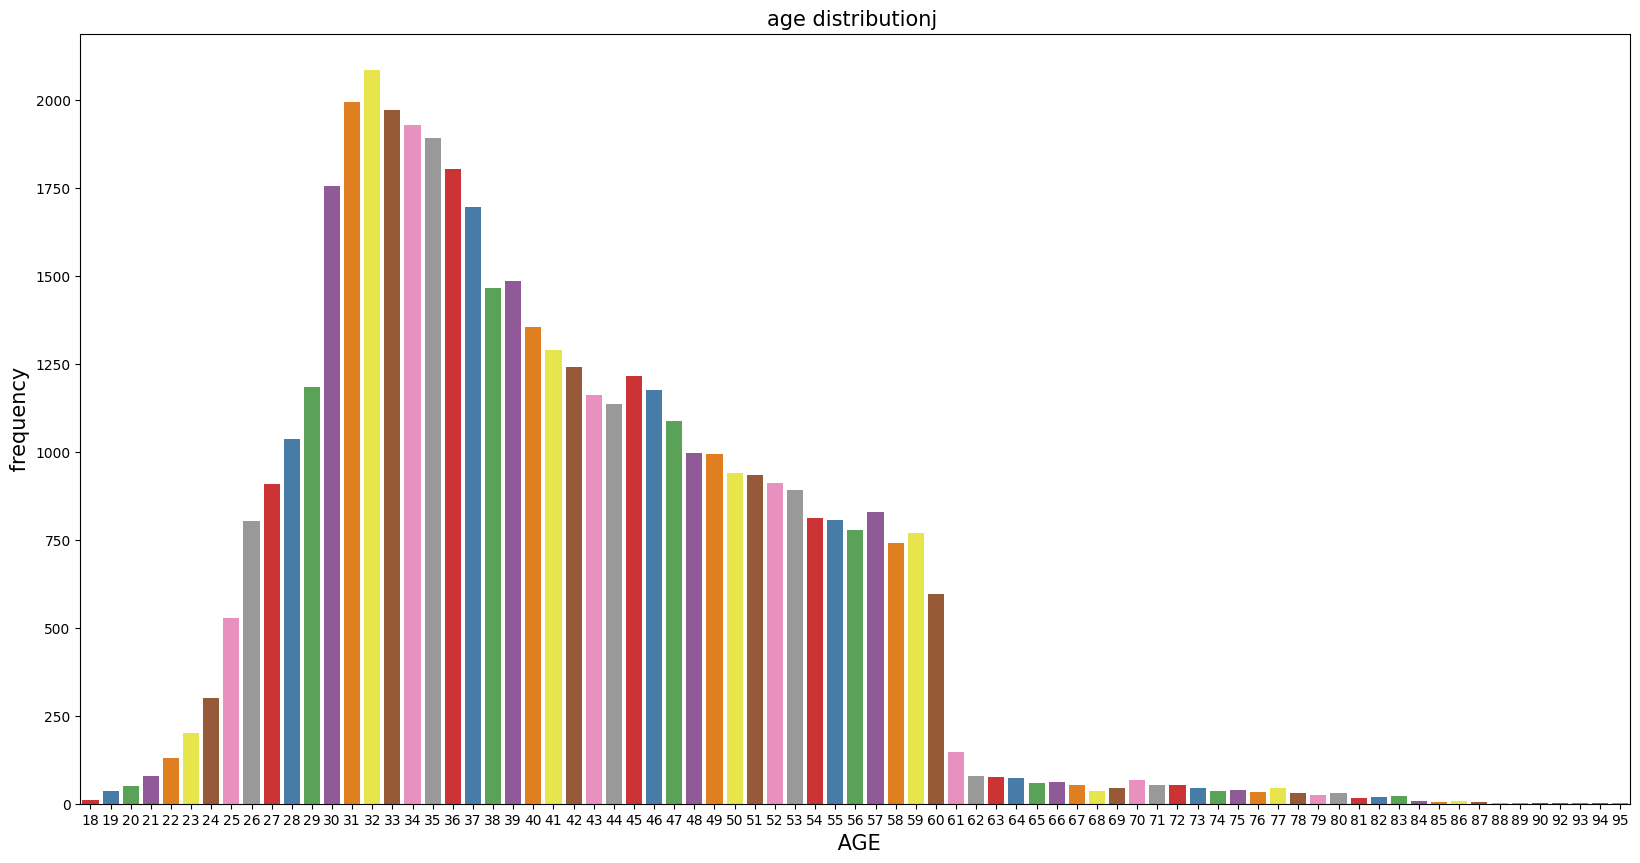

In [ ]:
import seaborn as sns
plot=plt.subplots(figsize=(20,10))
sns.countplot(x='age', data=df,palette="Set1")
plt.title("age distributionj ",fontsize=15)
plt.xlabel(" AGE",fontsize=15)
plt.ylabel(" frequency ",fontsize=15)
plt.show()



2. Job



<ipython-input-47-606b19eef1c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job', data=df, palette='inferno')


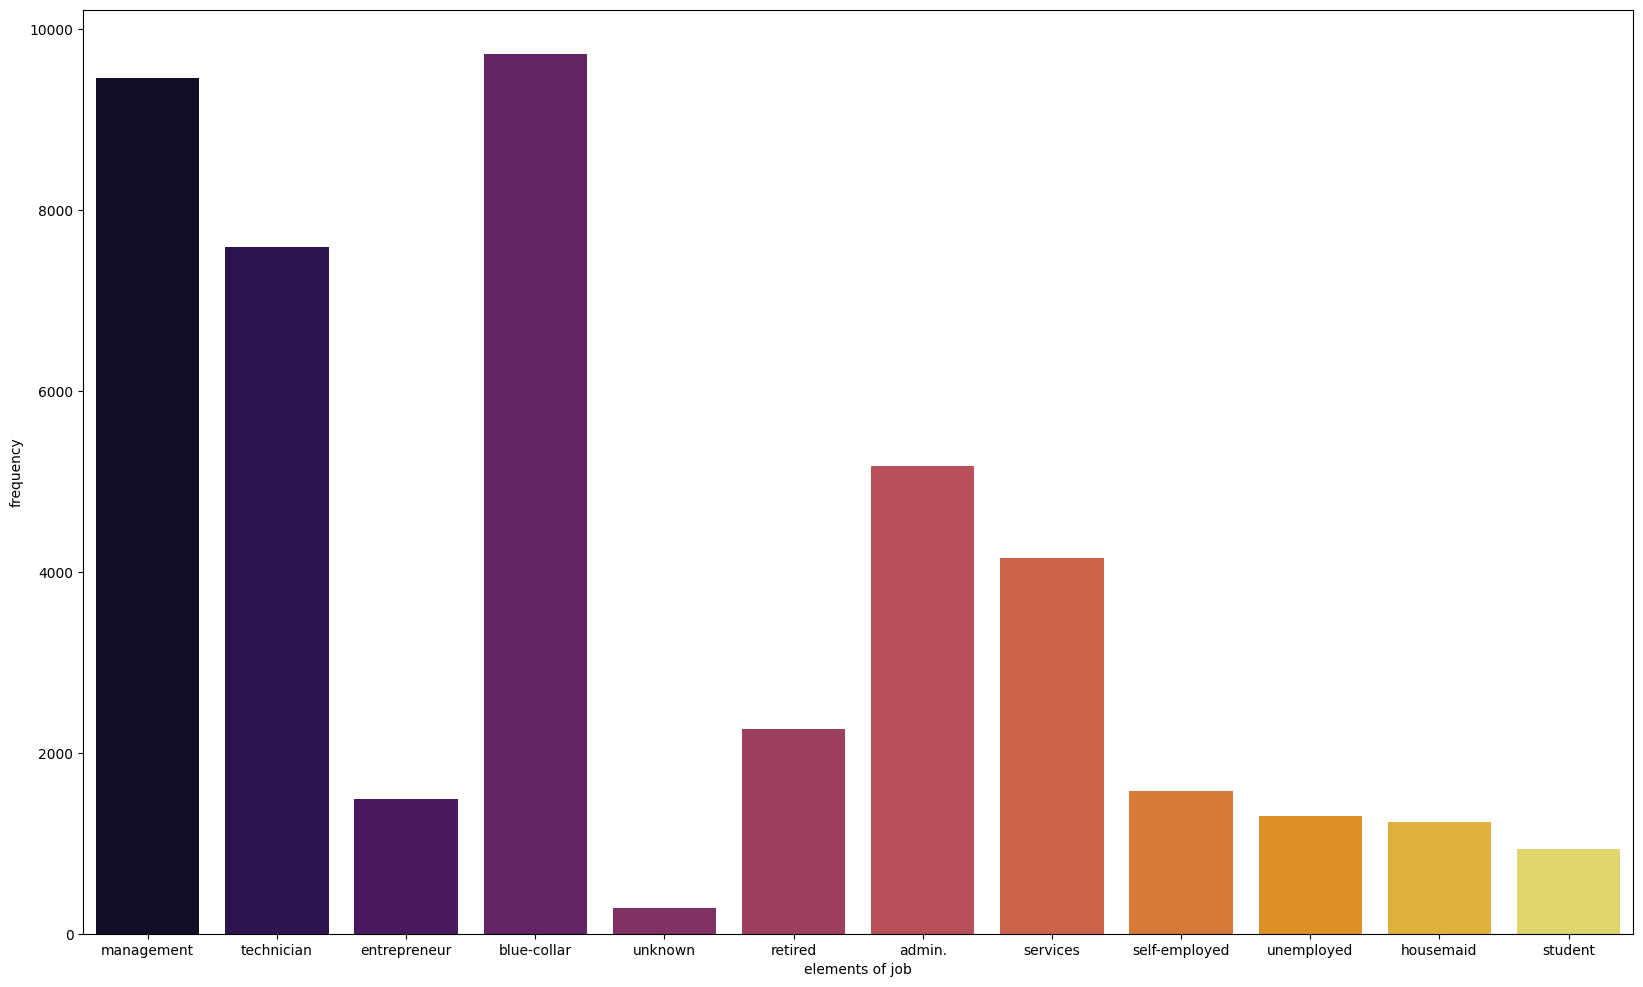

Counter({'blue-collar': 9732, 'management': 9458, 'technician': 7597, 'admin.': 5171, 'services': 4154, 'retired': 2264, 'self-employed': 1579, 'entrepreneur': 1487, 'unemployed': 1303, 'housemaid': 1240, 'student': 938, 'unknown': 288})


In [ ]:
plt.figure(figsize=(20,12))
sns.countplot(x='job', data=df, palette='inferno')
plt.xlabel("elements of job")
plt.ylabel("frequency")
plt.show()
df['job'].unique()
print(Counter(df['job']))


3. Marital


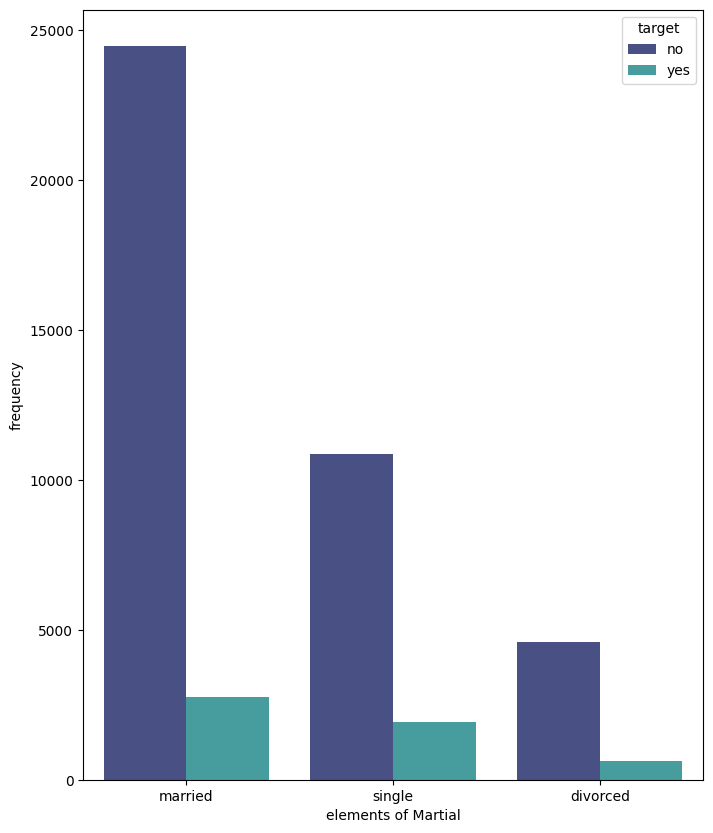

Counter({'married': 27214, 'single': 12790, 'divorced': 5207})

In [ ]:
plt.figure(figsize=(8,10))
sns.countplot(x='marital', data=df, hue='target', palette='mako')
plt.xlabel("elements of Martial")
plt.ylabel("frequency")
plt.show()
df['marital'].unique()
z=Counter(df['marital'])
z



4. Loan


<ipython-input-49-e1f1a72ad743>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='loan',data=df,palette='rocket')


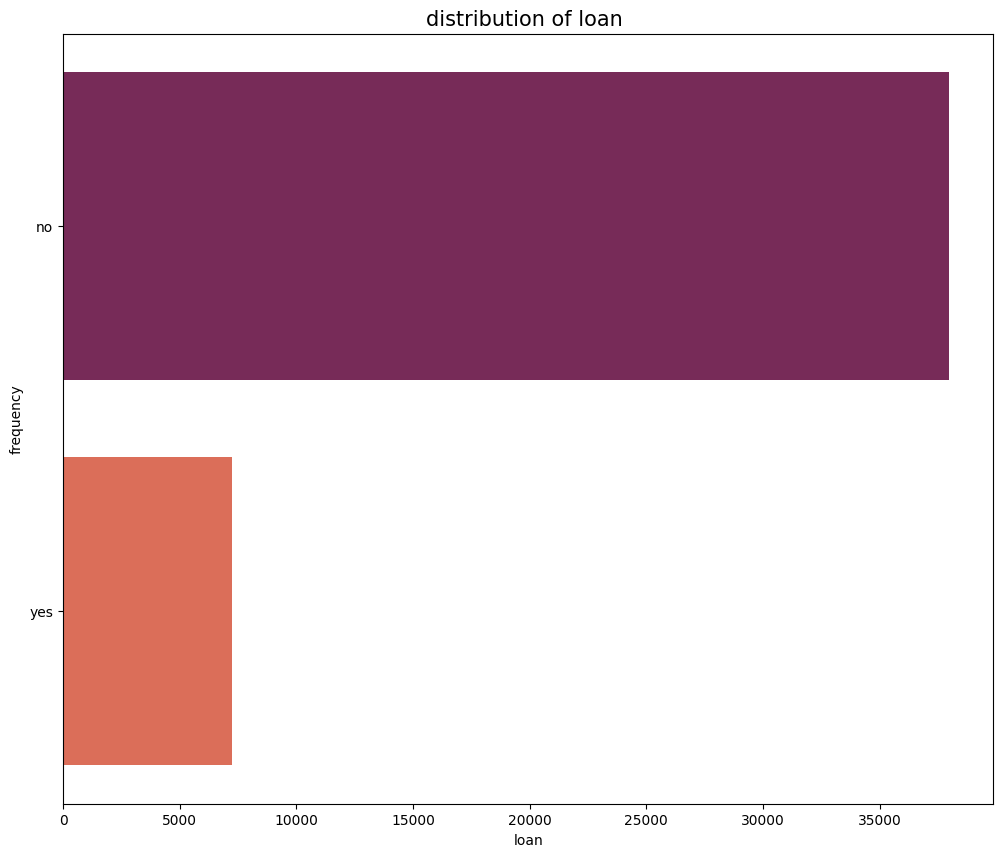

Counter({'no': 37967, 'yes': 7244})

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(y='loan',data=df,palette='rocket')
plt.xlabel("loan")
plt.ylabel("frequency")
plt.title("distribution of loan ", fontsize=15)
plt.show()

df['loan'].unique()
z=Counter(df['loan'])
z

**11) We divide our data for training and testing .**

In [ ]:
df['target']=df['target'].map({'no' : 0, 'yes':1})
x=df.drop(['target'], axis=1)
y=df['target']
X_train, X_test, Y_train, Y_test=train_test_split(x,y, test_size=0.2)

print("elements in X_train:", X_train.shape)
print("elements in X_test: ",X_test.shape)
print("elements in Y_train:",Y_train.shape)
print("elements in Y_test:",Y_test.shape)

elements in X_train: (36168, 16)
elements in X_test:  (9043, 16)
elements in Y_train: (36168,)
elements in Y_test: (9043,)


In [ ]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
6060,37,management,single,tertiary,no,337,yes,no,unknown,26,may,777,5,-1,0,unknown
8255,33,admin.,married,secondary,no,471,yes,no,unknown,2,jun,214,2,-1,0,unknown
25500,34,blue-collar,single,primary,no,-343,yes,yes,cellular,19,nov,207,1,-1,0,unknown
16854,35,technician,single,secondary,yes,0,no,no,cellular,25,jul,72,3,-1,0,unknown
7511,46,entrepreneur,married,primary,no,171,yes,no,unknown,29,may,52,3,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45028,60,retired,divorced,secondary,no,514,no,no,cellular,15,oct,187,2,213,10,success
4042,37,management,single,secondary,no,792,yes,no,unknown,16,may,1187,4,-1,0,unknown
37203,50,management,married,secondary,no,42,yes,no,cellular,13,may,85,2,265,4,other
36322,44,blue-collar,married,secondary,no,1071,yes,no,cellular,11,may,143,3,357,1,failure


In [ ]:
encoder=ce.OrdinalEncoder(cols=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'duration', 'poutcome'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.fit_transform(X_test)
X_train.keys

<bound method NDFrame.keys of        age  job  marital  education  default  balance  housing  loan  contact  \
6060    37    1        1          1        1      337        1     1        1   
8255    33    2        2          2        1      471        1     1        1   
25500   34    3        1          3        1     -343        1     2        2   
16854   35    4        1          2        2        0        2     1        2   
7511    46    5        2          3        1      171        1     1        1   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45028   60    8        3          2        1      514        2     1        2   
4042    37    1        1          2        1      792        1     1        1   
37203   50    1        2          2        1       42        1     1        2   
36322   44    3        2          2        1     1071        1     1        2   
29708   26    3        1          2        1     4751        2     1        2   

       day  month  duration  campaign  pdays  previous  poutcome  
6060    26      1         1         5     -1         0         1  
8255     2      2         2         2     -1         0         1  
25500   19      3         3         1     -1         0         1  
16854   25      4         4         3     -1         0         1  
7511    29      1         5         3     -1         0         1  
...    ...    ...       ...       ...    ...       ...       ...  
45028   15     10       314         2    213        10         2  
4042    16      1      1255         4     -1         0         1  
37203   13      1       317         2    265         4         3  
36322   11      1       494         3    357         1         4  
29708    3      6       116         3     -1         0         1  

[36168 rows x 16 columns]>

**12) Random Forest Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train, Y_train)
Y_pred=RF.predict(X_test)
Accuracy=accuracy_score (Y_test, Y_pred)
conf=confusion_matrix(Y_test,Y_pred)
report=classification_report(Y_test,Y_pred)
print(f"Accuracy score of Random forest Algorithm is {Accuracy*100} %")
print(f"Confusion Matrix : \n {conf} ")
print(f"Classification report is as follows : \n {report}")

Accuracy score of Random forest Algorithm is 88.12341037266394 %
Confusion Matrix : 
 [[7788  199]
 [ 875  181]] 
Classification report is as follows : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7987
           1       0.48      0.17      0.25      1056

    accuracy                           0.88      9043
   macro avg       0.69      0.57      0.59      9043
weighted avg       0.85      0.88      0.86      9043



**Checking the controbution of each attribute in our project .**

In [ ]:
f_score=pd.Series(RF.feature_importances_,index=X_train.columns).sort_values(ascending=True)
f_score

default      0.002007
loan         0.010324
contact      0.019805
previous     0.023027
marital      0.023797
housing      0.026973
education    0.030336
campaign     0.042886
pdays        0.051535
poutcome     0.052174
job          0.053844
day          0.096974
month        0.098640
age          0.110531
balance      0.126652
duration     0.230495
dtype: float64

In [ ]:
X_train.drop(columns=['default', 'loan'])
X_test.drop(columns=['default', 'loan'])
RF=RandomForestClassifier(n_estimators=100)
RF.fit(X_train, Y_train)
Y_pred=RF.predict(X_test)
Accuracy=accuracy_score(Y_test, Y_pred)
conf=confusion_matrix(Y_test, Y_pred)
report=classification_report (Y_test,Y_pred)
print(f"Accuracy score of Random forest Algorithm is {Accuracy*100} %")
print(f"Confusion Matrix : \n {conf}")
print(f"Classification report is as follows : \n {report} ")

Accuracy score of Random forest Algorithm is 88.17870175826606 %
Confusion Matrix : 
 [[7789  198]
 [ 871  185]]
Classification report is as follows : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7987
           1       0.48      0.18      0.26      1056

    accuracy                           0.88      9043
   macro avg       0.69      0.58      0.60      9043
weighted avg       0.85      0.88      0.86      9043
 


We remove outliners from the data for better accuracy .

In [ ]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
Sc.fit(X_train)
X_train=Sc.transform(X_train)
X_test=Sc.transform(X_test)
RF=RandomForestClassifier()
RF.fit(X_train, Y_train)
Y_pred=RF.predict(X_test)
Accuracy=accuracy_score(Y_test,Y_pred)
conf=confusion_matrix(Y_test,Y_pred)
report=classification_report (Y_test,Y_pred)
print(f"Accuracy score of Random forest Algorithm is {Accuracy*100} %")
print(f"Confusion Matrix : \n {conf} ")
print(f"Classification report is as follows : \n {report}")

Accuracy score of Random forest Algorithm is 87.91330310737587 %
Confusion Matrix : 
 [[7762  225]
 [ 868  188]] 
Classification report is as follows : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      7987
           1       0.46      0.18      0.26      1056

    accuracy                           0.88      9043
   macro avg       0.68      0.57      0.60      9043
weighted avg       0.85      0.88      0.86      9043



KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, Y_train)
Y_predicted=KNN.predict(X_test)
print(f"accuracy of the model is {accuracy_score(Y_test,Y_predicted) *100} ")

accuracy of the model is 87.19451509454827 


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train, Y_train)
Y_predicted=log.predict(X_test)
print(f"accuracy of the model is {accuracy_score(Y_test,Y_predicted)*100} ")

accuracy of the model is 88.22293486674776 


We get around 90% accuracy for Random Forest Classifier Model and its the highest among all the model .